In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [2]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,3,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,4,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,5,17,8,302,140,3449,10.5,70,1,ford torino


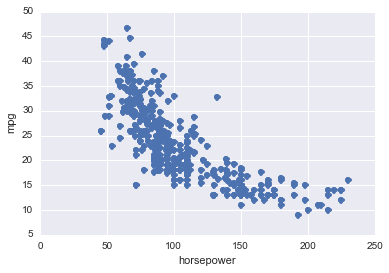

In [3]:
plt.plot(auto.horsepower,auto.mpg,'o')
plt.ylabel('mpg')
plt.xlabel('horsepower')

## Validation

Let's start by fitting a second degree polynomial using sklearn. We start by doing validation to understand the basic principle and implementation. Later we extend it to performed cross-validation to select the best model complexity.

In [4]:
X = auto[['horsepower']].values # double brakets important to get column vector which is what sklearn expects
y = auto['mpg'].values
i_train = random.sample(range(len(y)),len(y)*4/5) #select .8 of the data for training
i_val = list(set(range(len(y)))- set(i_train) )
X_train, y_train = X[i_train], y[i_train] 
X_val, y_val = X[i_val], y[i_val]

In [5]:
poly = PolynomialFeatures(degree=2)
X_trans = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
clf.fit(X_trans,y_train)

# Calculate mean squared error
X_val_trans = poly.fit_transform(X_val)
MSE = sum((clf.predict(X_val_trans) - y_val)**2)/len(y_val)
# calculate R^2
print clf.score(X_val_trans,y_val)

0.716639396802


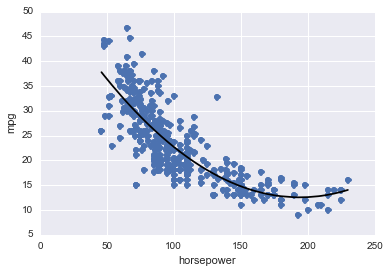

In [6]:
inx = np.argsort(auto.horsepower) # index for ascending order for horsepower, so the plot shows like a line
plt.plot(X,y,'o')
plt.plot(X[inx],clf.predict(poly.fit_transform(X))[inx],'-k')
plt.ylabel('mpg')
plt.xlabel('horsepower')

## 5-fold Cross-validation

In [9]:
kf = cross_validation.KFold(n=len(X),n_folds=5,shuffle=True) # generate indices for train and test sets

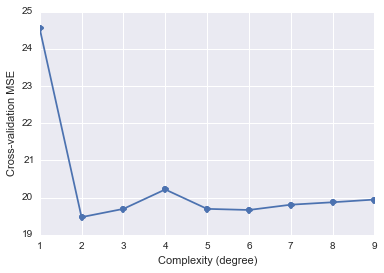

In [10]:
MSE_degree = []
degree_list = range(1,10)
for degree in degree_list: 
    MSE_val = []
    for i_train, i_val in kf:
        X_train, y_train = X[i_train], y[i_train] 
        X_val, y_val = X[i_val], y[i_val]
        poly = PolynomialFeatures(degree)
        X_trans = poly.fit_transform(X_train)
        clf = linear_model.LinearRegression()
        clf.fit(X_trans,y_train)

        # Calculate mean squared error
        X_val_trans = poly.fit_transform(X_val)
        MSE_val.append(sum((clf.predict(X_val_trans) - y_val)**2)/len(y)) # divide by n because nk cancels out in 
    MSE_degree.append(sum(MSE_val))                                       # the formula ErrorCv  = sum(nk/n ErrorK) 
plt.plot(degree_list,MSE_degree,'-o')
plt.xlabel('Complexity (degree)')
plt.ylabel('Cross-validation MSE')

We see that the second order polynommial fit gives the smallest error.